In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/train.csv').drop(columns='subject')
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,WALKING_UPSTAIRS


In [5]:
df['Activity'].value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [7]:
# Separate features and target
X = df.drop('Activity', axis=1)
y=df['Activity']
le=LabelEncoder()
y=le.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr= LogisticRegression(max_iter=1000)
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [9]:
print(accuracy_score(y_test,y_pred)*100)

98.09653297076818


In [10]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)

In [11]:
print(np.mean(cv_scores))

0.9838468607493975


#`filter based technique- duplicated columns`

In [12]:
def get_duplicate_columns(df):
  duplicate_columns={}
  for i ,col1 in enumerate(df.columns):
    for j in range(i+1,len(df.columns)):
      col2=df.columns[j]
      if df[col1].equals(df[col2]):
        if col1 in duplicate_columns:
          duplicate_columns[col1].append(col2)
        else:
          duplicate_columns[col1] = [col2]
  return duplicate_columns
get_duplicate_columns(df)

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-sma()': ['tGravityAccMag-mean()', 'tGravityAccMag-sma()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tGravityAccMag-mean()': ['tGravityAccMag-sma()'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag

In [13]:
def get_duplicate_columns(df):
  duplicate_columns={}
  for i ,col1 in enumerate(df.columns):
    for col2 in df.columns[i+1:]:
      if df[col1].equals(df[col2]):
        if col1 in duplicate_columns:
          duplicate_columns[col1].append(col2)
        else:
          duplicate_columns[col1] = [col2]
  return duplicate_columns
get_duplicate_columns(df)

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-sma()': ['tGravityAccMag-mean()', 'tGravityAccMag-sma()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tGravityAccMag-mean()': ['tGravityAccMag-sma()'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag

In [14]:
(df['tBodyAccMag-mean()']/df['tBodyAccMag-sma()']).value_counts()

,count
1.0,7352


In [15]:
duplicates = {
    'tBodyAccMag-std()': ['tGravityAccMag-std()'],
    'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
    'tBodyAccMag-max()': ['tGravityAccMag-max()'],
    'tBodyAccMag-min()': ['tGravityAccMag-min()'],
    'tBodyAccMag-sma()': ['tGravityAccMag-mean()', 'tGravityAccMag-sma()'],
    'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
    'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
    'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
    'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
    'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
    'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
    'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
    'tGravityAccMag-mean()': ['tGravityAccMag-sma()'],
    'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
    'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
    'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
    'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
    'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
    'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'],
    'fBodyBodyGyroJerkMag-mean()': ['fBodyBodyGyroJerkMag-sma()']
}

In [16]:
list=[col for sublist in duplicates.values() for col in sublist]

In [17]:
df.drop(columns=list,inplace=True)

In [18]:
# Separate features and target
X = df.drop('Activity', axis=1)
y=df['Activity']
le=LabelEncoder()
y=le.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr1= LogisticRegression(max_iter=1000)
model1=lr1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [20]:
X_train.shape

(5881, 541)

In [21]:
print(accuracy_score(y_test,y_pred)*100)

98.09653297076818


In [22]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1, X_train, y_train, cv=kfold)

In [23]:
print(np.mean(cv_scores)*100)

98.35067246949757


##`2. Variance Threshold`

In [24]:
from sklearn.feature_selection import VarianceThreshold
value=VarianceThreshold(threshold=0.05)

In [25]:
value.fit(X_train)

VarianceThreshold(threshold=0.05)

In [26]:
sum(value.get_support())

350

In [27]:
columns=X_train.columns[value.get_support()]

In [28]:
X_train=value.transform(X_train)
X_test=value.transform(X_test)

In [29]:
X_train=pd.DataFrame(X_train,columns=columns)
X_test=pd.DataFrame(X_test,columns=columns)

In [30]:
print(X_train.shape)

(5881, 350)


In [31]:
lr1= LogisticRegression(max_iter=1000)
model2=lr1.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

98.09653297076818


In [32]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model2, X_train, y_train, cv=kfold)
print(np.mean(cv_scores))

0.9821464694628913


In [33]:
X_train.shape

(5881, 350)

#`Correlation`

<Axes: >

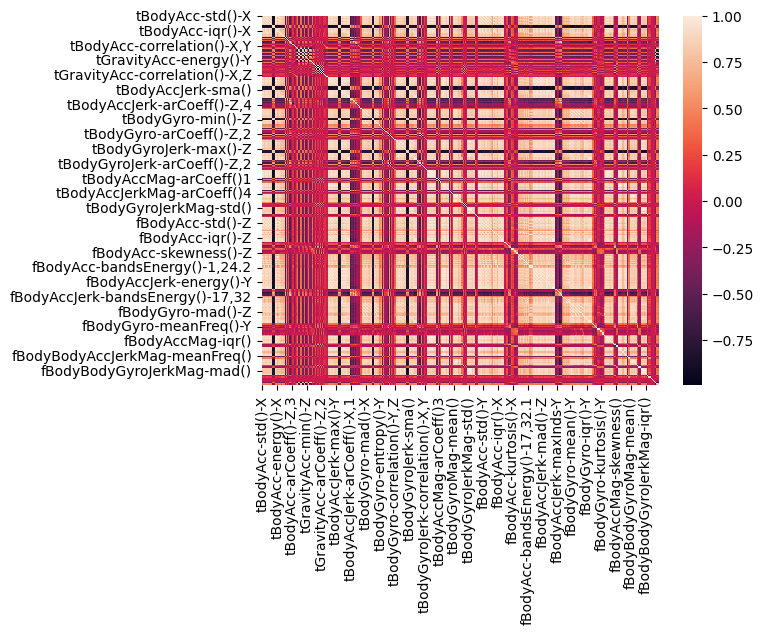

In [34]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [35]:
# corr_matrix=X_train .corr()
# columns=corr_matrix.columns
# columns_to_drop=[]
# for i in range(len(columns)):
#   for j in range(i+1,len(columns)):
#     if corr_matrix.loc[columns[i],columns[j]] >0.95:
#       columns_to_drop.append(columns[j])
# print(len(columns_to_drop))

In [36]:
y_corr=X_train.apply(lambda x:np.corrcoef(x,y_train)[0,1])
y_corr

,0
tBodyAcc-std()-X,0.815310
tBodyAcc-std()-Y,0.825836
tBodyAcc-std()-Z,0.800740
tBodyAcc-mad()-X,0.805965
tBodyAcc-mad()-Y,0.826689
...,...
"angle(tBodyGyroMean,gravityMean)",-0.021565
"angle(tBodyGyroJerkMean,gravityMean)",-0.002277
"angle(X,gravityMean)",-0.619582
"angle(Y,gravityMean)",0.726503


In [37]:
corr_matrix=X_train .corr()
columns=corr_matrix.columns
columns_to_drop=[]
y_corr=X_train.apply(lambda x:np.corrcoef(x,y_train)[0,1])
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    if corr_matrix.loc[columns[i],columns[j]] >0.95:
      if y_corr[columns[i]]>y_corr[columns[i]]:
        columns_to_drop.append(columns[j])
      else:
        columns_to_drop.append(columns[i])
print(len(columns_to_drop))

1552


In [38]:
columns_to_drop=set(columns_to_drop)
print(len(columns_to_drop))

181


In [39]:
X_train.drop(columns=columns_to_drop,axis=1,inplace=True)
X_test.drop(columns=columns_to_drop,axis=1,inplace=True)

In [40]:
print(X_train.shape)
print(X_test.shape)

(5881, 169)
(1471, 169)


In [41]:
X_train

,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,0.004176,-0.108410,0.495195,...,-1.000000,0.394506,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,0.392201,-0.401846,0.427721,...,0.353098,0.052089,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,0.500452,-0.246499,0.132848,...,0.267168,-0.038923,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,0.123315,0.077527,0.063520,...,-0.648647,-0.145084,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,-0.160030,0.105931,0.123825,...,-0.955696,0.096524,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,0.434208,-0.283949,0.104390,...,0.110793,0.022624,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,-0.030538,-0.121917,0.513832,...,0.169341,-0.039773,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,0.445134,-0.353909,0.243808,...,0.035062,0.094031,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,-0.169618,0.381625,-0.341222,...,-1.000000,0.539885,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


In [42]:
lr1= LogisticRegression(max_iter=1000)
model4=lr1.fit(X_train,y_train)
y_pred=model4.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

97.41672331747111


#`Anova`

In [43]:
from sklearn.feature_selection import f_classif,SelectKBest
sel=SelectKBest(f_classif,k=100).fit(X_train,y_train)
columns=X_train.columns[sel.get_support()]

In [44]:
X_train=sel.transform(X_train)
X_test=sel.transform(X_test)

In [45]:
X_train=pd.DataFrame(X_train,columns=columns)
X_test=pd.DataFrame(X_test,columns=columns)

In [46]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [47]:
lr1= LogisticRegression(max_iter=1000)
model4=lr1.fit(X_train,y_train)
y_pred=model4.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

97.14479945615227


In [48]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold)
print(np.mean(cv_scores))

0.9670141718539582


#`chi-square`

In [13]:
df=pd.read_csv('/content/train.csv')
df=df[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [14]:
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    int64 
 1   Sex       891 non-null    object
 2   SibSp     891 non-null    int64 
 3   Parch     891 non-null    int64 
 4   Embarked  889 non-null    object
 5   Survived  891 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [16]:
ct=pd.crosstab(df['Sex'],df['Survived'],margins=True)
ct

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [17]:
from scipy.stats import chi2_contingency

In [18]:
chi2_stat, p_value, dof, expected = chi2_contingency(ct)

In [19]:
expected

array([[193.47474747, 120.52525253, 314.        ],
       [355.52525253, 221.47474747, 577.        ],
       [549.        , 342.        , 891.        ]])

In [21]:
score=[]
for i  in df.columns[:-1]:
  ct=pd.crosstab(df[i],df['Survived'],margins=True)
  chi2_stat, p_value, dof, expected = chi2_contingency(ct)
  score.append(p_value)
print(score)

[6.258462423531468e-20, 1.0036732821369117e-55, 0.000670965497493342, 0.014554047586837713, 0.00018045058101554055]


<Axes: >

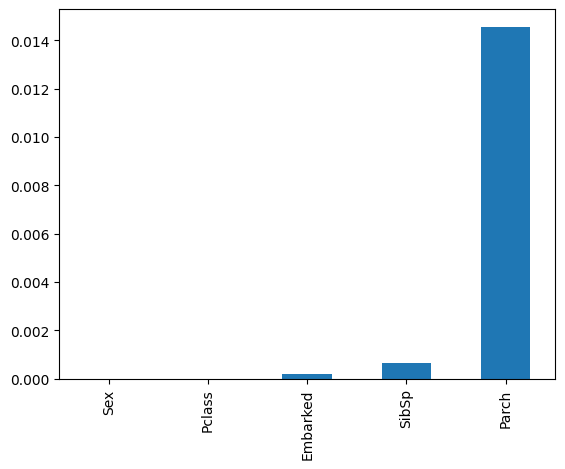

In [25]:
pd.Series(score,index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [30]:
# Separate features and target
le=LabelEncoder()
df=df.apply(le.fit_transform)
X = df.drop('Survived', axis=1)
y=df['Survived']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,Pclass,Sex,SibSp,Parch,Embarked
331,0,1,0,0,2
733,1,1,0,0,2
382,2,1,0,0,2
704,2,1,1,0,2
813,2,0,4,2,2
...,...,...,...,...,...
106,2,0,0,0,2
270,0,1,0,0,2
860,2,1,2,0,2
435,0,0,1,2,2


In [33]:
lr1= LogisticRegression(max_iter=1000)
model=lr1.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

77.09497206703911


In [35]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(np.mean(cv_scores)*100)

79.21402541120851


In [38]:
X_train=X_train[['Pclass','Sex','Embarked']]
X_test=X_test[['Pclass','Sex','Embarked']]

In [40]:
lr1= LogisticRegression(max_iter=1000)
model1=lr1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

76.53631284916202


In [41]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1, X_train, y_train, cv=kfold)
print(np.mean(cv_scores)*100)

77.53274894119964
